In [1]:
# script that analyzes and computes figures for experimental data on ESRRG-PSMC5 interactions
import db_utils
import AF_plot_functions
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq
from matplotlib import gridspec
import matplotlib
#matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Arial'
%matplotlib inline

from matplotlib.ticker import FormatStrFormatter

connect = db_utils.get_connection()
cursor = connect.cursor()

path = '/Users/luck/IMB/projects/AlphaFold/exp_data_analysis/'

In [2]:
def get_saturation_curve_data(project_id,NL_id,mCit_id,connect,FL_id):
    titration_query = f"""select a.project_id,a.NL_plasmid,a.mCit_plasmid,a.NL_property,a.mCit_property,
                c.measurement/d.measurement BRET,a.NL_plasmid_id,a.mCit_plasmid_id,a.plate_id,b.avg_FL,
                e.measurement totLu,a.well_id 
                from luthy_data.plate_layout a, luthy_data.FL_avg_points b, luthy_data.LU_raw c, 
                    luthy_data.LU_raw d, luthy_data.LU_raw e 
                where a.project_id='{project_id}' and a.include=1 and a.project_id=b.project_id and 
                    a.project_id=c.project_id and a.project_id=d.project_id and a.project_id=e.project_id and 
                    a.plate_id=b.plate_id and a.plate_id=c.plate_id and a.plate_id=d.plate_id and 
                    a.plate_id=e.plate_id and a.well_id=b.well_id and a.well_id=c.well_id and 
                    a.well_id=d.well_id and a.well_id=e.well_id and a.NL_plasmid_id='{NL_id}' and 
                    a.mCit_plasmid_id='{mCit_id}' and c.measurement_id='accLu01' and d.measurement_id='donLu01' 
                    and e.measurement_id='totLu01' and b.measurement_id='{FL_id}'"""
    bleedthrough_query = f"""select c.measurement/d.measurement bleedthrough,a.plate_id
                from luthy_data.plate_layout a, luthy_data.LU_raw c, luthy_data.LU_raw d
                where a.project_id='{project_id}' and a.include=1 and a.project_id=c.project_id and 
                    a.project_id=d.project_id and a.plate_id=c.plate_id and a.plate_id=d.plate_id and 
                    a.well_id=c.well_id and a.well_id=d.well_id and a.NL_plasmid_id='KL_03' and 
                    a.mCit_plasmid_id='empty' and c.measurement_id='accLu01' and d.measurement_id='donLu01'"""
    bkg_query = f"""select b.avg_FL bkg_FL,c.measurement bkg_LU,a.plate_id
                    from luthy_data.plate_layout a, luthy_data.FL_avg_points b, luthy_data.LU_raw c 
                    where a.project_id='{project_id}' and a.include=1 and a.project_id=b.project_id and 
                        a.project_id=c.project_id and a.plate_id=b.plate_id and a.plate_id=c.plate_id and 
                        a.well_id=b.well_id and a.well_id=c.well_id and a.NL_plasmid_id='KL_01' and 
                        a.mCit_plasmid_id='empty' and b.measurement_id='{FL_id}' and c.measurement_id='totLu01'"""

    BRET_df = pandas.read_sql(titration_query,connect)
    well_ids_to_modify = ['A7','A8','A9','A10','A11','A12','B7','B8','B9','B10','B11','B12',\
                          'C7','C8','C9','C10','C11','C12','D7','D8','D9','D10','D11','D12',\
                          'E7','E8','E9','E10','E11','E12']
    BRET_df.loc[(BRET_df['project_id']=='Lu128r01') & (BRET_df['well_id'].isin(well_ids_to_modify)),'plate_id'] = 6
    BT_df = pandas.read_sql(bleedthrough_query,connect)
#    print(BT_df)
    bkg_df = pandas.read_sql(bkg_query,connect)
#    print(bkg_df)
    
    BRET_df['norm_BRET'] = BRET_df['BRET'] - np.mean(list(BT_df['bleedthrough']))
    BRET_df['expr_ratio'] = (BRET_df['avg_FL'] - np.mean(list(bkg_df['bkg_FL'])))/(BRET_df['totLu'] - np.mean(list(bkg_df['bkg_LU'])))
#    print(BRET_df)
    
    return BRET_df

('KL_775', 'KL_632', 'Lu132r01', 'FL01')
('KL_775', 'KL_817', 'Lu128r01', 'FL01')
('KL_775', 'KL_823', 'Lu132r01', 'FL01')


/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_38266/2092611727.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  BRET_df = pandas.read_sql(titration_query,connect)
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_38266/2092611727.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  BT_df = pandas.read_sql(bleedthrough_query,connect)
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_38266/2092611727.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bkg_df = pandas.read_sql(bkg_query,conn

('KL_775', 'KL_632', 'Lu132r01', 'FL01')
('KL_775', 'KL_818', 'Lu132r01', 'FL01')
('KL_775', 'KL_632', 'Lu132r01', 'FL01')
('KL_824', 'KL_632', 'Lu128r01', 'FL01')
('KL_828', 'KL_632', 'Lu132r01', 'FL01')


/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_38266/2092611727.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  BRET_df = pandas.read_sql(titration_query,connect)
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_38266/2092611727.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  BT_df = pandas.read_sql(bleedthrough_query,connect)
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_38266/2092611727.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bkg_df = pandas.read_sql(bkg_query,conn

/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_38266/2092611727.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  BRET_df = pandas.read_sql(titration_query,connect)
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_38266/2092611727.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  BT_df = pandas.read_sql(bleedthrough_query,connect)
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_38266/2092611727.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bkg_df = pandas.read_sql(bkg_query,conn

('KL_775', 'KL_632', 'Lu133r01', 'FL01')
('KL_775', 'KL_817', 'Lu132r01', 'FL01')
('KL_775', 'KL_823', 'Lu133r01', 'FL01')
('KL_775', 'KL_632', 'Lu133r01', 'FL01')


/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_38266/1622030611.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bret_expr_df = bret_expr_df.append(BRET_df,ignore_index=True)
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_38266/1622030611.py:97: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bret50_df = bret50_df.append({'pair':pair_label,'project_id':plasmid_pair[2],'plate_id':plate_id,
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_38266/1622030611.py:97: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bret50_df = bret50_df.append({'pair':pair_label,'project_id':plasmid_pair[2],'plate_id':plate_id,
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_38266/1622030611.py:97: Futur

('KL_775', 'KL_818', 'Lu133r01', 'FL01')
('KL_775', 'KL_632', 'Lu133r01', 'FL01')
('KL_824', 'KL_632', 'Lu132r01', 'FL01')
('KL_828', 'KL_632', 'Lu133r01', 'FL01')


/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_38266/2092611727.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bkg_df = pandas.read_sql(bkg_query,connect)
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_38266/1622030611.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bret_expr_df = bret_expr_df.append(BRET_df,ignore_index=True)
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_38266/1622030611.py:97: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bret50_df = bret50_df.append({'pair':pair_label,'project_id':plasmid_pair[2],'plate_id':plate_id,
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_38266/162203061

['ESRRG - PSMC5', 'ESRRG - PSMC5', 'ESRRG - PSMC5', 'ESRRG - PSMC5_M138R', 'ESRRG - PSMC5_M138R', 'ESRRG - PSMC5_M138R', 'ESRRG - PSMC5_L134E', 'ESRRG - PSMC5_L134E', 'ESRRG - PSMC5_L134E', 'ESRRG - PSMC5', 'ESRRG - PSMC5', 'ESRRG - PSMC5', 'ESRRG - PSMC5_I401D', 'ESRRG - PSMC5_I401D', 'ESRRG - PSMC5_I401D', 'ESRRG - PSMC5', 'ESRRG - PSMC5', 'ESRRG - PSMC5', 'ESRRG_I280E - PSMC5', 'ESRRG_I280E - PSMC5', 'ESRRG_I280E - PSMC5', 'ESRRG_M453F - PSMC5', 'ESRRG_M453F - PSMC5', 'ESRRG_M453F - PSMC5']


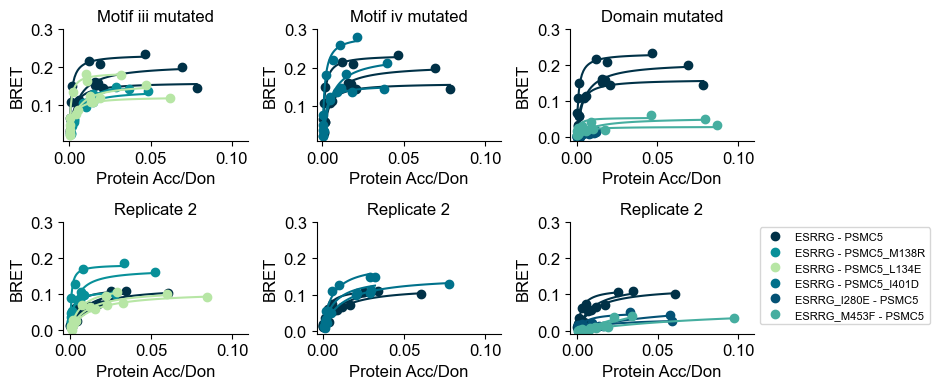

In [16]:
# plot titration curves, fit the data and compute BRET 50
plasmid_pair_sets = [[('KL_775','KL_632','Lu132r01','FL01'),('KL_775','KL_817','Lu128r01','FL01'),
                      ('KL_775','KL_823','Lu132r01','FL01')],
                     [('KL_775','KL_632','Lu132r01','FL01'),('KL_775','KL_818','Lu132r01','FL01')],
                     [('KL_775','KL_632','Lu132r01','FL01'),('KL_824','KL_632','Lu128r01','FL01'),
                      ('KL_828','KL_632','Lu132r01','FL01')],
                     [('KL_775','KL_632','Lu133r01','FL01'),('KL_775','KL_817','Lu132r01','FL01'),
                      ('KL_775','KL_823','Lu133r01','FL01')],
                     [('KL_775','KL_632','Lu133r01','FL01'),('KL_775','KL_818','Lu133r01','FL01')],
                     [('KL_775','KL_632','Lu133r01','FL01'),('KL_824','KL_632','Lu132r01','FL01'),
                      ('KL_828','KL_632','Lu133r01','FL01')]
                    ]

labels_colors = {('KL_775','KL_632'):('ESRRG - PSMC5','#003147'),
          ('KL_775','KL_818'):('ESRRG - PSMC5_I401D','#00718B'),
          ('KL_775','KL_817'):('ESRRG - PSMC5_M138R','#089099'),
          ('KL_775','KL_823'):('ESRRG - PSMC5_L134E','#B7E6A5'),
          ('KL_824','KL_632'):('ESRRG_I280E - PSMC5','#045275'), #I264E
          ('KL_828','KL_632'):('ESRRG_M453F - PSMC5','#46AEA0')} # M437F

titles = ['Motif iii mutated','Motif iv mutated','Domain mutated','Replicate 2','Replicate 2','Replicate 2']

# create dict where data is safed
fit_dict = {}

# create df to save BRET50 and BRETmax
bret50_df = pandas.DataFrame({'pair':[],'project_id':[],'plate_id':[],'bret50':[],'bret50_err':[],'bretmax':[],
                              'bretmax_err':[],'color':[],'NL_plasmid_id':[],'mCit_plasmid_id':[]})

# create df to save BRET values and avg expression values
bret_expr_df = pandas.DataFrame({'project_id':[],'NL_plasmid':[],'mCit_plasmid':[],'NL_property':[],'mCit_property':[],
                                 'BRET':[],'NL_plasmid_id':[],'mCit_plasmid_id':[],'plate_id':[],
                                 'avg_FL':[],'totLu':[],'norm_BRET':[],'expr_ratio':[]})
#set the size of the figure plot
plt.figure(figsize=(9.5,4))

artist_collection = []
labels_collection = []

for p,plasmid_pairs in enumerate(plasmid_pair_sets):

    plt.subplot(2,3,p+1)

    for i,plasmid_pair in enumerate(plasmid_pairs):
        print(plasmid_pair)
        pair_label = labels_colors[(plasmid_pair[0],plasmid_pair[1])][0]
        pair_color = labels_colors[(plasmid_pair[0],plasmid_pair[1])][1]
        BRET_df = get_saturation_curve_data(plasmid_pair[2],plasmid_pair[0],plasmid_pair[1],connect,plasmid_pair[3])
        BRET_df.sort_values(['plate_id','expr_ratio'],inplace=True)
#        print(BRET_df)
        bret_expr_df = bret_expr_df.append(BRET_df,ignore_index=True)
        plate_ids = list(set(list(BRET_df['plate_id'])))
#        print(plate_ids)
        
        for plate_id in plate_ids:

            sub_df = BRET_df.loc[BRET_df['plate_id']==plate_id,['expr_ratio','norm_BRET']].reset_index()
            adr_list = sub_df['expr_ratio']
            bret_list = sub_df['norm_BRET']
            # here, create lambda function to define the equation that describes the saturation curve
            func = lambda par,adr : par[0]*adr/(par[1] + adr)
            # ErrorFunc is the diference between the func and the y "experimental" data
            ErrorFunc = lambda par,adr,bret: func(par,adr)-bret
            #tplInitial contains the "first guess" of the parameters 
            Initial1 = (bret_list[len(bret_list)-1],0.01)
            # leastsq finds the parameter bret_max and kd that minimize ErrorFunc=yfit-yExperimental
            #JMS: Changed below line to output all objects from leastsq() - of interest is 'pcov'
            final,pcov,lsdict,lsmesg,success=leastsq(ErrorFunc,Initial1,args=(adr_list,bret_list),full_output=True)
            xx1=np.linspace(adr_list.min(),adr_list.max(),50)
            yy1=func(final,xx1)
            bret_max = final[0]
            bret50 = final[1]

            # JMS: Compute std err for bret50 (according to statistical estimate of error for an estimated parameter)
            #      Calculate residual variance
            s_sq = (ErrorFunc(final,adr_list,bret_list)**2).sum()/(len(bret_list)-len(final))
            #      Multiply residual variance by fractional covariance matrix supplied by leastsq() <- this is the variance-covariance matrix
            pcov = s_sq * pcov
            #      Extract standard error: square root of values along the diagonal of variance-covariance matrix
            sterr_bret50 = (np.absolute(pcov[1][1]))**(1/2)
            sterr_bretmax = (np.absolute(pcov[0][0]))**(1/2)

            # safe data in dict
            xx1_l = xx1.tolist()
            yy1_l = yy1.tolist()
            plasmid_name = "__".join(plasmid_pair)
            data_x_y = {"experiment_name":pair_label,"data" : {"x" : xx1_l, "y": yy1_l}}
            fit_dict[plasmid_name] = data_x_y

            # plot titration curve
            line1 = plt.plot(adr_list,bret_list,linestyle='',color=pair_color,marker='o',label=pair_label)
            # plot fit line
            xx1=np.linspace(adr_list.min(),adr_list.max(),50)
            yy1=func(final,xx1)
            plt.plot(xx1,yy1,linestyle='-',color=pair_color)

            bret50_df = bret50_df.append({'pair':pair_label,'project_id':plasmid_pair[2],'plate_id':plate_id,
                                          'bret50':bret50,'bret50_err':sterr_bret50,'bretmax':bret_max,
                                          'bretmax_err':sterr_bretmax,'color':pair_color,
                                          'NL_plasmid_id':plasmid_pair[0],'mCit_plasmid_id':plasmid_pair[1]},
                                          ignore_index=True)

    plt.title(titles[p],fontsize=12)
    plt.xlabel('Protein Acc/Don',fontsize=12)
    plt.ylabel('BRET',fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(top=0.3)
    plt.xlim(right=0.11)
    ax = plt.gca()
    if p in [0,1,2]:
        handles, labels = ax.get_legend_handles_labels()
        artist_collection = artist_collection + handles
        labels_collection = labels_collection + labels
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.spines[['right', 'top']].set_visible(False)
    plt.tight_layout()
    
artist_collection_final = []
labels_collection_final = []

print(labels_collection)
for i in [0,3,6,12,18,21]:
    artist_collection_final.append(artist_collection[i])
    labels_collection_final.append(labels_collection[i])


plt.legend(handles=artist_collection_final,labels=labels_collection_final,bbox_to_anchor=(1.0,1.0), fontsize=8)
plt.tight_layout()

df = pandas.DataFrame.from_dict(fit_dict)

plt.savefig(path+'ESRRG_PSMC5_titration_Lu128r01_Lu132r01_Lu133r01.pdf')
plt.savefig(path+'ESRRG_PSMC5_titration_Lu128r01_Lu132r01_Lu133r01.jpeg',dpi=300)
plt.show()

In [4]:
bret50_df

,pair,project_id,plate_id,bret50,bret50_err,bretmax,bretmax_err,color,NL_plasmid_id,mCit_plasmid_id
0,ESRRG - PSMC5,Lu132r01,1.0,2.307928e-03,4.882363e-04,1.604973e-01,7.522054e-03,#003147,KL_775,KL_632
1,ESRRG - PSMC5,Lu132r01,2.0,4.548374e-03,4.696406e-04,2.082417e-01,5.634875e-03,#003147,KL_775,KL_632
2,ESRRG - PSMC5,Lu132r01,3.0,1.125228e-03,1.381121e-04,2.334911e-01,6.453642e-03,#003147,KL_775,KL_632
3,ESRRG - PSMC5_M138R,Lu128r01,4.0,4.027004e-03,4.672794e-04,1.594531e-01,5.611980e-03,#089099,KL_775,KL_817
4,ESRRG - PSMC5_M138R,Lu128r01,5.0,5.901860e-03,8.980489e-04,1.745943e-01,9.370016e-03,#089099,KL_775,KL_817
5,ESRRG - PSMC5_M138R,Lu128r01,6.0,3.829563e-03,6.451424e-04,1.403869e-01,6.894280e-03,#089099,KL_775,KL_817
6,ESRRG - PSMC5_L134E,Lu132r01,1.0,2.016914e-03,2.259383e-04,1.221033e-01,2.776244e-03,#B7E6A5,KL_775,KL_823
7,ESRRG - PSMC5_L134E,Lu132r01,2.0,3.989673e-03,8.271564e-04,1.578276e-01,7.878500e-03,#B7E6A5,KL_775,KL_823
8,ESRRG - PSMC5_L134E,Lu132r01,3.0,8.499831e-04,1.070512e-04,1.859183e-01,4.758298e-03,#B7E6A5,KL_775,KL_823
9,ESRRG - PSMC5,Lu132r01,1.0,2.307928e-03,4.882363e-04,1.604973e-01,7.522054e-03,#003147,KL_775,KL_632


In [5]:
bret_expr_df

,project_id,NL_plasmid,mCit_plasmid,NL_property,mCit_property,BRET,NL_plasmid_id,mCit_plasmid_id,plate_id,avg_FL,totLu,norm_BRET,expr_ratio,well_id
0,Lu132r01,pcDNA3.1 ESRRG-NL-cmyc,pcDNA3.1 mCit-His3C-PSMC5,2ng,12.5ng,0.3231,KL_775,KL_632,1.0,525.2,326574.0,0.030517,0.000692,A7
1,Lu132r01,pcDNA3.1 ESRRG-NL-cmyc,pcDNA3.1 mCit-His3C-PSMC5,2ng,25ng,0.3519,KL_775,KL_632,1.0,793.5,368436.0,0.059317,0.001362,A8
2,Lu132r01,pcDNA3.1 ESRRG-NL-cmyc,pcDNA3.1 mCit-His3C-PSMC5,2ng,50ng,0.4008,KL_775,KL_632,1.0,1931.0,346467.0,0.108217,0.004845,A9
3,Lu132r01,pcDNA3.1 ESRRG-NL-cmyc,pcDNA3.1 mCit-His3C-PSMC5,2ng,100ng,0.4470,KL_775,KL_632,1.0,5076.8,314887.0,0.154417,0.015710,A10
4,Lu132r01,pcDNA3.1 ESRRG-NL-cmyc,pcDNA3.1 mCit-His3C-PSMC5,1ng,100ng,0.4371,KL_775,KL_632,1.0,3596.2,171042.0,0.144517,0.020586,A11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Lu133r01,pcDNA3.1 ESRRG-NL-cmyc_M437F,pcDNA3.1 mCit-His3C-PSMC5,2ng,25ng,0.3073,KL_828,KL_632,3.0,550.5,173779.0,0.003133,0.001168,B8
284,Lu133r01,pcDNA3.1 ESRRG-NL-cmyc_M437F,pcDNA3.1 mCit-His3C-PSMC5,2ng,50ng,0.3094,KL_828,KL_632,3.0,803.8,171606.0,0.005233,0.002703,B9
285,Lu133r01,pcDNA3.1 ESRRG-NL-cmyc_M437F,pcDNA3.1 mCit-His3C-PSMC5,2ng,100ng,0.3123,KL_828,KL_632,3.0,1860.8,195941.0,0.008133,0.007892,B10
286,Lu133r01,pcDNA3.1 ESRRG-NL-cmyc_M437F,pcDNA3.1 mCit-His3C-PSMC5,1ng,100ng,0.3173,KL_828,KL_632,3.0,2191.2,115346.0,0.013133,0.016642,B11


('KL_775', 'KL_632', 'Lu132r01', 'FL01')
             pair project_id  plate_id    bret50  bret50_err   bretmax  \
0   ESRRG - PSMC5   Lu132r01       1.0  0.002308    0.000488  0.160497   
1   ESRRG - PSMC5   Lu132r01       2.0  0.004548    0.000470  0.208242   
2   ESRRG - PSMC5   Lu132r01       3.0  0.001125    0.000138  0.233491   
9   ESRRG - PSMC5   Lu132r01       1.0  0.002308    0.000488  0.160497   
10  ESRRG - PSMC5   Lu132r01       2.0  0.004548    0.000470  0.208242   
11  ESRRG - PSMC5   Lu132r01       3.0  0.001125    0.000138  0.233491   
15  ESRRG - PSMC5   Lu132r01       1.0  0.002308    0.000488  0.160497   
16  ESRRG - PSMC5   Lu132r01       2.0  0.004548    0.000470  0.208242   
17  ESRRG - PSMC5   Lu132r01       3.0  0.001125    0.000138  0.233491   

    bretmax_err    color NL_plasmid_id mCit_plasmid_id  
0      0.007522  #003147        KL_775          KL_632  
1      0.005635  #003147        KL_775          KL_632  
2      0.006454  #003147        KL_775         

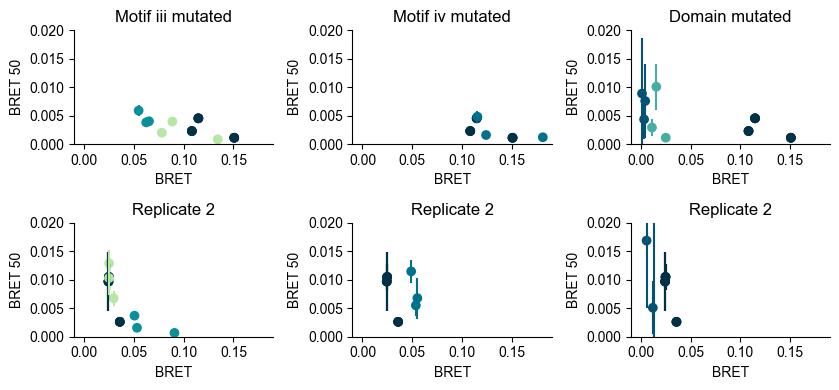

In [17]:
# plot the scatter plot BRET50 vs BRET
plasmid_pair_sets = [[('KL_775','KL_632','Lu132r01','FL01'),('KL_775','KL_817','Lu128r01','FL01'),
                      ('KL_775','KL_823','Lu132r01','FL01')],
                     [('KL_775','KL_632','Lu132r01','FL01'),('KL_775','KL_818','Lu132r01','FL01')],
                     [('KL_775','KL_632','Lu132r01','FL01'),('KL_824','KL_632','Lu128r01','FL01'),
                      ('KL_828','KL_632','Lu132r01','FL01')],
                     [('KL_775','KL_632','Lu133r01','FL01'),('KL_775','KL_817','Lu132r01','FL01'),
                      ('KL_775','KL_823','Lu133r01','FL01')],
                     [('KL_775','KL_632','Lu133r01','FL01'),('KL_775','KL_818','Lu133r01','FL01')],
                     [('KL_775','KL_632','Lu133r01','FL01'),('KL_824','KL_632','Lu132r01','FL01')]
                    ]

plt.figure(figsize=(8.5,4))

for p,plasmid_pairs in enumerate(plasmid_pair_sets):

    plt.subplot(2,3,p+1)
    BRET_values = []
    BRET50_std = []
    BRET_50_values = []
    colors = []

    for plasmid_pair in plasmid_pairs:
        print(plasmid_pair)
        BRET_values = BRET_values + list(bret_expr_df.loc[(bret_expr_df['NL_property']=='2ng') & 
                                          (bret_expr_df['mCit_property']=='50ng') & 
                                          (bret_expr_df['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (bret_expr_df['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (bret_expr_df['project_id']==plasmid_pair[2]),'norm_BRET'])
#         print(bret_expr_df.loc[(bret_expr_df['NL_property']=='2ng') & 
#                                           (bret_expr_df['mCit_property']=='50ng') & 
#                                           (bret_expr_df['NL_plasmid_id']==plasmid_pair[0]) & 
#                                           (bret_expr_df['mCit_plasmid_id']==plasmid_pair[1]) & 
#                                           (bret_expr_df['project_id']==plasmid_pair[2])])

        BRET_50_values = BRET_50_values + list(bret50_df.loc[(bret50_df['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (bret50_df['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (bret50_df['project_id']==plasmid_pair[2]),'bret50'])
        print(bret50_df.loc[(bret50_df['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (bret50_df['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (bret50_df['project_id']==plasmid_pair[2])])

        BRET50_std = BRET50_std + list(bret50_df.loc[(bret50_df['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (bret50_df['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (bret50_df['project_id']==plasmid_pair[2]),'bret50_err'])
 
        colors = colors + list(bret50_df.loc[(bret50_df['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (bret50_df['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (bret50_df['project_id']==plasmid_pair[2]),'color'])


    print(len(BRET_values))
    print(len(BRET_50_values))
    print(len(BRET50_std))
    print(len(colors))

    plt.errorbar(BRET_values,BRET_50_values,yerr=BRET50_std,marker='',linestyle='',ecolor=colors)
    plt.scatter(BRET_values,BRET_50_values,marker='o',color=colors)
    plt.title(titles[p],fontsize=12)
    plt.ylabel('BRET 50',fontsize=10)
    plt.xlabel('BRET',fontsize=10)
    plt.xlim((-0.01,0.19))
    plt.ylim((0,0.02))
#     if p in [0,1,2,3,4]:
#         plt.ylim((0,0.02))
#     else:
#         plt.ylim((-0.2,0.2))
    ax = plt.gca()
    ax.spines[['right', 'top']].set_visible(False)

plt.tight_layout()
plt.savefig(path+'ESRRG_PSMC5_BRET50err_vs_BRET_Lu128r01_Lu132r01_Lu133r01.pdf')
plt.savefig(path+'ESRRG_PSMC5_BRET50err_vs_BRET_Lu128r01_Lu132r01_Lu133r01.jpeg',dpi=300)
plt.show()

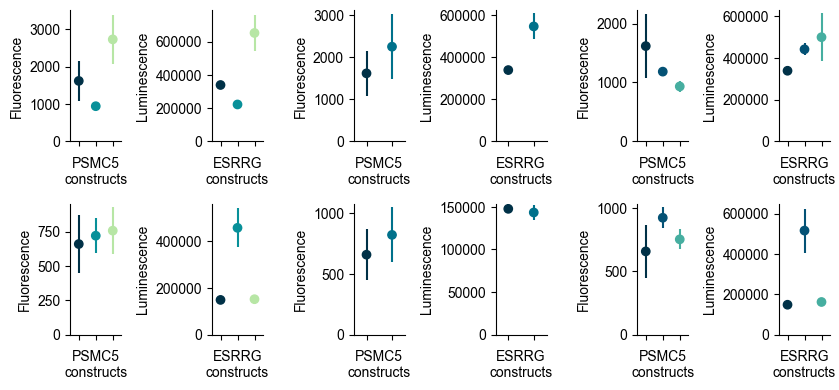

In [60]:
# plot the expression values for both partner proteins

plt.figure(figsize=(8.5,4))

avgFL_gr = bret_expr_df.groupby(['project_id','NL_plasmid_id','mCit_plasmid_id','NL_property','mCit_property'])['avg_FL'].aggregate(['mean','std']).reset_index()
avgLU_gr = bret_expr_df.groupby(['project_id','NL_plasmid_id','mCit_plasmid_id','NL_property','mCit_property'])['totLu'].aggregate(['mean','std']).reset_index()

for p,plasmid_pairs in enumerate(plasmid_pair_sets):

    plt.subplot(2,6,p*2+1)
    FL_values = []
    FL_std = []
    colors = []

    for plasmid_pair in plasmid_pairs:
        FL_values.append(list(avgFL_gr.loc[(avgFL_gr['NL_property']=='2ng') & 
                                          (avgFL_gr['mCit_property']=='50ng') & 
                                          (avgFL_gr['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (avgFL_gr['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (avgFL_gr['project_id']==plasmid_pair[2]),'mean'])[0])

        FL_std.append(list(avgFL_gr.loc[(avgFL_gr['NL_property']=='2ng') & 
                                          (avgFL_gr['mCit_property']=='50ng') & 
                                          (avgFL_gr['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (avgFL_gr['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (avgFL_gr['project_id']==plasmid_pair[2]),'std'])[0])
 
        colors.append(labels_colors[(plasmid_pair[0],plasmid_pair[1])][1])

    plt.errorbar(range(len(FL_values)),FL_values,yerr=FL_std,marker='',linestyle='',ecolor=colors)
    plt.scatter(range(len(FL_values)),FL_values,marker='o',color=colors)
    plt.ylabel('Fluorescence',fontsize=10)
    plt.xlabel('PSMC5\nconstructs',fontsize=10)
    plt.ylim(bottom=0)
    plt.xlim(-0.5,len(FL_values)-0.5)
    plt.xticks(range(len(FL_values)),'')
    ax = plt.gca()
    ax.spines[['right', 'top']].set_visible(False)


    plt.subplot(2,6,p*2+2)
    LU_values = []
    LU_std = []

    for plasmid_pair in plasmid_pairs:
        LU_values.append(list(avgLU_gr.loc[(avgLU_gr['NL_property']=='2ng') & 
                                          (avgLU_gr['mCit_property']=='50ng') & 
                                          (avgLU_gr['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (avgLU_gr['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (avgLU_gr['project_id']==plasmid_pair[2]),'mean'])[0])

        LU_std.append(list(avgLU_gr.loc[(avgLU_gr['NL_property']=='2ng') & 
                                          (avgLU_gr['mCit_property']=='50ng') & 
                                          (avgLU_gr['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (avgLU_gr['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (avgLU_gr['project_id']==plasmid_pair[2]),'std'])[0])
 

    plt.errorbar(range(len(LU_values)),LU_values,yerr=LU_std,marker='',linestyle='',ecolor=colors)
    plt.scatter(range(len(LU_values)),LU_values,marker='o',color=colors)
    plt.ylabel('Luminescence',fontsize=10)
    plt.xlabel('ESRRG\nconstructs',fontsize=10)
    plt.xticks(range(len(LU_values)),'')
    plt.ylim(bottom=0)
    plt.xlim(-0.5,len(LU_values)-0.5)
    ax = plt.gca()
    ax.spines[['right', 'top']].set_visible(False)

    
plt.tight_layout()
plt.savefig(path+'ESRRG_PSMC5_expr_Lu128r01_Lu132r01_Lu133r01.pdf')
plt.savefig(path+'ESRRG_PSMC5_expr_Lu128r01_Lu132r01_Lu133r01.jpeg',dpi=300)
plt.show()